## **Feature Engineering**

Whatever you do with features, we call it as Feature Engineering.

* Feature Elimination - dropping the features.

* Feature Addition - Adding some features.

* Feature Transformation - Transforming the given feature values into an another scale - Log Transformation, Sqrt Tranformation .......

* Feature Selection - Deciding which features are important out of many features and choosing that features for Model building.

#### **Feature Selection Techniques**

* Sklearn - SelectFromModel.

* Sklearn - RFE(ie,Recursive Feature Elimination)

## **Import The Necessary Libraries**

In [61]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE,SelectFromModel
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score


import warnings
warnings.filterwarnings('ignore')

## **Importing The Data**

In [13]:
dataset = load_breast_cancer()
dataset.data
cancer_data = pd.DataFrame(dataset.data,columns =dataset.feature_names)
cancer_data['Target'] = dataset.target

In [14]:
cancer_data 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## **Data Understanding**

In [15]:
cancer_data.shape

(569, 31)

In [16]:
cancer_data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [17]:
cancer_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [18]:
cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


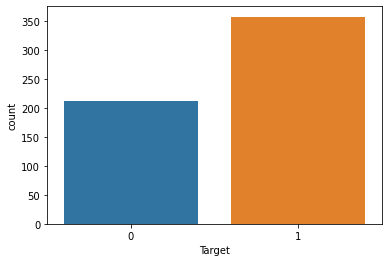

In [25]:
sns.countplot(cancer_data['Target'])
plt.show()

## **Model Building**

In [30]:
x = cancer_data.drop(labels=['Target'],axis=1)
y = cancer_data[['Target']]

In [31]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 12,stratify = y)

In [36]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [38]:
y_train.shape,y_test.shape

((455, 1), (114, 1))

## **Model Training**

#### **1. SelectFromModel**

In [44]:
Select_Features = SelectFromModel(estimator = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1,random_state=12),max_features=None)
Select_Features.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=12))

In [45]:
Select_Features.get_support()

array([False, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [47]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [52]:
Selected_Features = x_train.columns[Select_Features.get_support()]

In [53]:
Selected_Features

Index(['mean area', 'mean concave points', 'area error', 'worst radius',
       'worst perimeter', 'worst area', 'worst concave points'],
      dtype='object')

In [51]:
len(Selected_Features)

7

In [57]:
x_train_imp_features = Select_Features.transform(x_train)
x_test_imp_features = Select_Features.transform(x_test)

In [58]:
x_train_imp_features.shape,x_test_imp_features.shape

((455, 7), (114, 7))

## **Random Forest Model**

In [80]:
%%time
def RunRandomForestClassifier(x_train,y_train,x_test,y_test):
    RF_Model = RandomForestClassifier(n_estimators=100,max_depth=4,n_jobs=-1,random_state=12)
    RF_Model.fit(x_train,y_train) 
    y_train_pred = RF_Model.predict(x_train) 
    y_test_pred = RF_Model.predict(x_test)
    print('Accuracy Score     :', round(accuracy_score(y_test,y_test_pred),4))
    print('Precision Score    :', round(precision_score(y_test,y_test_pred),4))
    print('Recall Score       :', round(recall_score(y_test,y_test_pred),4))
    print('Confusion Matrix   :\n', confusion_matrix(y_test,y_test_pred))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [104]:
RunRandomForestClassifier(x_train,y_train,x_test,y_test) # 30 features

Accuracy Score     : 0.9474
Precision Score    : 0.9714
Recall Score       : 0.9444
Confusion Matrix   :
 [[40  2]
 [ 4 68]]


In [82]:
RunRandomForestClassifier(x_train_imp_features,y_train,x_test_imp_features,y_test) # 9 features

Accuracy Score     : 0.9386
Precision Score    : 0.9452
Recall Score       : 0.9583
Confusion Matrix   :
 [[38  4]
 [ 3 69]]


#### **2. RFE**

In [97]:
CRFE_Features = RFE(estimator=RandomForestClassifier(n_estimators=100,max_depth=4,n_jobs=-1,random_state=12) ,n_features_to_select=None)
RFE_Features.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=12))

In [98]:
RFE_Features.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [99]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [113]:
Selected_RFE_Features = x_train.columns[RFE.Features.get_support()]
Selected_RFE_Features 

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [101]:
len(Selected_RFE_Features)

15

In [102]:
x_train_RFE_Features = RFE_Features.transform(x_train)
x_test_RFE_Features = RFE_Features.transform(x_test)

In [103]:
RunRandomForestClassifier(x_train_RFE_Features,y_train,x_test_RFE_Features ,y_test) # 15 Features

Accuracy Score     : 0.9737
Precision Score    : 0.9726
Recall Score       : 0.9861
Confusion Matrix   :
 [[40  2]
 [ 1 71]]


#### **Pick up the important features of Gradient Boosting Classifier and use to it build RandomForestClassifier**

In [158]:
RFE_Features_1 = RFE(estimator=GradientBoostingClassifier(n_estimators=100,max_depth=4,random_state=12) ,n_features_to_select=12)
RFE_Features_1.fit(x_train,y_train)

RFE(estimator=GradientBoostingClassifier(max_depth=4, random_state=12),
    n_features_to_select=12)

In [150]:
RFE_Features_1.get_support()

array([False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False,  True])

In [151]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [152]:
Selected_Features_GB = x_train.columns[RFE_Features_1.get_support()]
Selected_Features_GB

Index(['mean texture', 'mean compactness', 'mean concavity',
       'mean concave points', 'area error', 'concavity error',
       'fractal dimension error', 'worst texture', 'worst area',
       'worst concavity', 'worst concave points', 'worst fractal dimension'],
      dtype='object')

In [153]:
len(Selected_Features_GB)

12

In [154]:
RFE_xtrain_GB_Features = RFE_Features_1.transform(x_train)
RFE_xtest_GB_Features = RFE_Features_1.transform(x_test)

In [155]:
RunRandomForestClassifier(RFE_xtrain_GB_Features,y_train,RFE_xtest_GB_Features,y_test) # 15 Features

Accuracy Score     : 0.9561
Precision Score    : 0.9589
Recall Score       : 0.9722
Confusion Matrix   :
 [[39  3]
 [ 2 70]]


#### **How to decide the optimum number of features ?**

In [156]:
for i in range(1,31):
    RFE_Features_1 = RFE(estimator=GradientBoostingClassifier(n_estimators=100,max_depth=4,random_state=12) ,n_features_to_select= i)
    RFE_Features_1.fit(x_train,y_train)
    RFE_xtrain_GB_Features = RFE_Features_1.transform(x_train)
    RFE_xtest_GB_Features = RFE_Features_1.transform(x_test)
    print('Selected Features :', i)
    RunRandomForestClassifier(RFE_xtrain_GB_Features,y_train,RFE_xtest_GB_Features,y_test)
    print('**************************************************************************************************************************************')

Selected Features : 1
Accuracy Score     : 0.8509
Precision Score    : 0.8986
Recall Score       : 0.8611
Confusion Matrix   :
 [[35  7]
 [10 62]]
**************************************************************************************************************************************
Selected Features : 2
Accuracy Score     : 0.9298
Precision Score    : 0.9444
Recall Score       : 0.9444
Confusion Matrix   :
 [[38  4]
 [ 4 68]]
**************************************************************************************************************************************
Selected Features : 3
Accuracy Score     : 0.9649
Precision Score    : 0.9595
Recall Score       : 0.9861
Confusion Matrix   :
 [[39  3]
 [ 1 71]]
**************************************************************************************************************************************
Selected Features : 4
Accuracy Score     : 0.9561
Precision Score    : 0.9589
Recall Score       : 0.9722
Confusion Matrix   :
 [[39  3]
 [ 2 70]]
*******

###### **n_features_to_select= 3 gives better result**

In [159]:
RFE_Features_1 = RFE(estimator=GradientBoostingClassifier(n_estimators=100,max_depth=4,random_state=12) ,n_features_to_select=3)
RFE_Features_1.fit(x_train,y_train)

RFE(estimator=GradientBoostingClassifier(max_depth=4, random_state=12),
    n_features_to_select=3)

In [160]:
RFE_Features_1.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False])

In [161]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [163]:
Selected_Features_GB = x_train.columns[RFE_Features_1.get_support()]
Selected_Features_GB

Index(['worst texture', 'worst area', 'worst concave points'], dtype='object')

In [164]:
len(Selected_Features_GB)

3

In [165]:
RFE_xtrain_GB_Features = RFE_Features_1.transform(x_train)
RFE_xtest_GB_Features = RFE_Features_1.transform(x_test)

In [166]:
RunRandomForestClassifier(RFE_xtrain_GB_Features,y_train,RFE_xtest_GB_Features,y_test) # 15 Features

Accuracy Score     : 0.9649
Precision Score    : 0.9595
Recall Score       : 0.9861
Confusion Matrix   :
 [[39  3]
 [ 1 71]]


##**Model Deployement**

In [167]:
from pickle import dump

In [169]:
dump(RFE_Features_1,open('RFE_pkl','wb'))

In [170]:
from pickle import load

In [173]:
RFE_Pickle = load(open('RFE_pkl','rb'))